In [37]:
import numpy as np
from pathlib import Path
from keras.preprocessing import image
import warnings 
warnings.filterwarnings("ignore")

In [38]:
p=Path('../downloads/training_images')

In [39]:
dirs=p.glob("*")
image_data=[]
for img_path in dirs:
    img=image.load_img(img_path,target_size=(100,100))
    img_array=image.img_to_array(img)
    image_data.append(img_array)

In [40]:
len(image_data)

304

#visualizing the data

In [41]:
image_data=np.array(image_data,dtype='float32')/300


In [42]:
import matplotlib.pyplot as plt
def draw(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

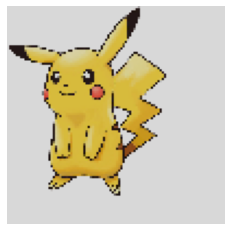

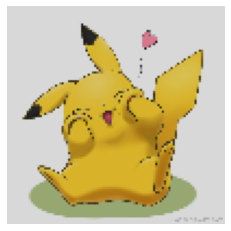

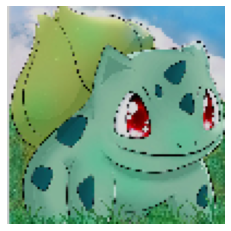

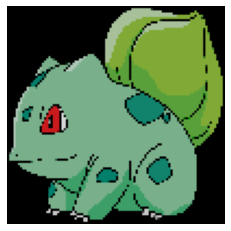

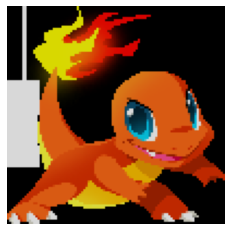

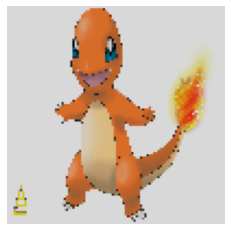

In [43]:
for i in [50,100,150,200,250,300]:
    draw(image_data[i])

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('train.csv')
df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [10]:
x=df.values
x.shape

(304, 2)

#FLATTENING THE IMAGE

In [11]:
m=image_data.shape[0]
image_data=image_data.reshape((m,-1))
image_data.shape

(304, 3072)

#RANDOMLY SHUFFLING THE DATA

In [12]:
x=np.hstack((x,image_data))

In [13]:
np.random.shuffle(x)

In [14]:
y_train=x[:,1]

In [15]:
x_train=x[:,2:]

In [16]:
x_train.shape

(304, 3072)

In [17]:
from sklearn import svm
svc=svm.SVC()
model=svc.fit(x_train,y_train)

#TESTING ACCURACY

In [18]:
model.score(x_train,y_train)*100

97.03947368421053

In [19]:
test=pd.read_csv('test.csv')

In [20]:
test.head()

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg


In [21]:
test=test.values

In [22]:
q=Path('../downloads/testing_images')
dirs=q.glob("*")
testing_image_data=[]
labels=[]
for img_path in dirs:
    label=str(img_path).split('\\')[-1]
    test_img=image.load_img(img_path,target_size=(32,32))
    test_img_array=image.img_to_array(test_img)
    testing_image_data.append(test_img_array)
    labels.append(label)

In [23]:
len(testing_image_data)

123

In [24]:
testing_image_data=np.array(testing_image_data,dtype='float32')/300
m=testing_image_data.shape[0]
testing_image_data=testing_image_data.reshape((m,-1))

In [25]:
testing_image_data.shape

(123, 3072)

In [26]:
#PREPARING PREDICTION LIST

In [27]:
predictions=[]
for i in test:
    for j in labels:
        if i==j:            
            pred=model.predict(testing_image_data[labels.index(j)].reshape((1,-1)))
            predictions.append(pred)

In [28]:
preds=[]
import re
for i in predictions:
    p=re.search('[A-Za-z]+',str(i))
    preds.append(p.group())
    

In [29]:
preds=np.array(preds)
preds=preds.reshape((-1,1))

In [30]:
test.shape

(123, 1)

In [31]:
test=np.hstack((test,preds))
prediction=pd.DataFrame(test,columns=['ImageId','NameOfPokemon'])

In [32]:
prediction.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Charmander


In [35]:
prediction.to_csv('predictions.csv',index=False)